# Hough transform

Using the input step, we repeat the edge detection:

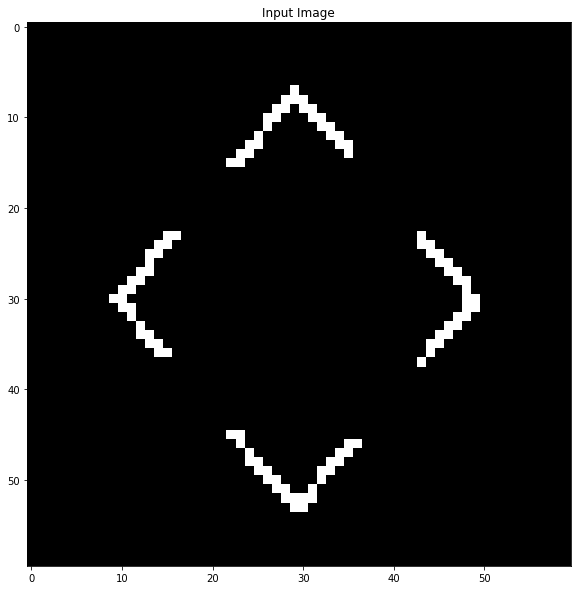

In [167]:
import cv2 as cv
import math
import matplotlib.pyplot as plt
import numpy as np

input_dir = './input/'
in_img_name = 'hough_test.png'
in_img = cv.imread(input_dir + in_img_name, cv.IMREAD_GRAYSCALE)

# in_img = np.zeros((50,50))
# in_img[25, 25] = 1
# in_img[20, 20] = 1
# canny_thresholds = [300, 400]
# edges = cv.Canny(in_img, canny_thresholds[0], canny_thresholds[1])
plt.figure(figsize=(15,10))
plt.imshow(in_img,cmap = 'gray')
plt.title('Input Image')
plt.show()

In [168]:
# Hough transform immpl
img = in_img
rho_step = 1
theta_step = np.pi / 180
threshold = 18
min_theta = -np.pi/2
max_theta = np.pi

w, h = in_img.shape

max_rho = w + h
min_rho = -max_rho

# number of values for rho and theta based on input params
num_angle = int(np.floor((max_theta - min_theta) / theta_step) + 1)
num_rho = int(np.round((max_rho - min_rho + 1) / rho_step))

accum = np.zeros((num_rho, num_angle), int)

for i in range(h):
  for j in range(w):
    if in_img[i][j] != 0:
      for n in range(num_angle):
        # theta angle in radians
        th = n * theta_step
        # Rho formula based on theory in hough space
        r = round(j * math.cos(th) + i * math.sin(th))
        # Move to center
        r += (num_rho - 1) / 2
        accum[int(r)][n] += 1


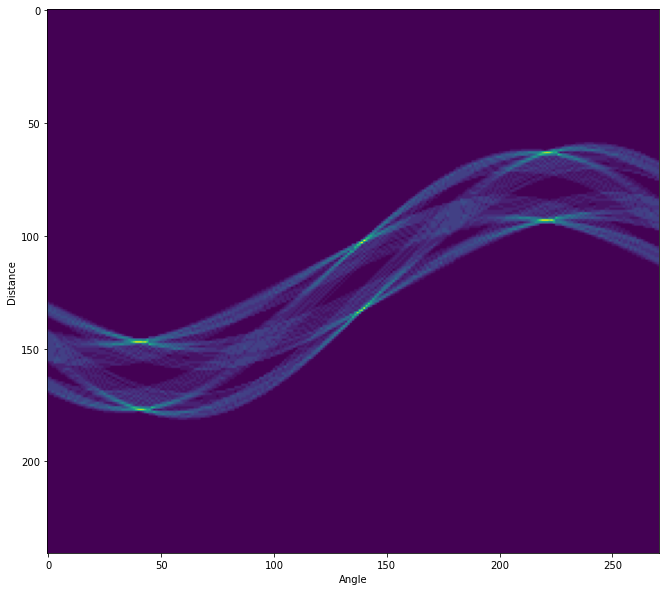

In [169]:
# print accumulator
plt.figure(figsize=(15,10))
plt.imshow(accum)
plt.xlabel('Angle')
plt.ylabel('Distance')
plt.axis('image')
plt.show()

In [ ]:
# find local maximums